# Classification
### Kirill Zakharov

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
x = np.array([28, 49, 48, 36, 45])

In [4]:
y = np.array([10, 49, 35, 33, 54])
z = np.array([1,1,0,1,0])

In [12]:
data = pd.DataFrame(np.array([x,y,z]).T, columns=['x', 'y', 'c'])
data

,x,y,c
0,28,10,1
1,49,49,1
2,48,35,0
3,36,33,1
4,45,54,0


In [13]:
new = np.array([33,47])

In [17]:
dist = np.sqrt((data.x - new[0])**2 + (data.y - new[1])**2)
dist

0    37.336309
1    16.124515
2    19.209373
3    14.317821
4    13.892444
dtype: float64

In [18]:
w = 1/dist**2

In [21]:
w[2] + w[4]

0.007891374250530072

In [22]:
w[0]+w[1]+w[3]

0.00944156274141927

## KNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn_data = pd.read_csv('Data/knn_data.csv')

In [7]:
knn_data.index = knn_data.id

In [10]:
knn_data = knn_data.iloc[:,1:]

In [11]:
knn_data

,X,Y,Class
id,,,
1,96,11,1
2,76,24,1
3,98,11,0
4,89,71,0
5,87,99,0
6,31,40,0
7,73,35,1
8,33,30,0
9,87,88,1


In [51]:
X_train, Y_train = knn_data.iloc[:,:2], knn_data.iloc[:,2]

In [107]:
knn_model = KNeighborsClassifier(n_neighbors=3, p=1)

In [108]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [109]:
point = pd.DataFrame(np.array([[68,46]]), columns=['X','Y'])

In [110]:
knn_model.predict(point)

array([1])

In [111]:
nearest = knn_model.kneighbors(point,n_neighbors=3,return_distance=True)

In [112]:
nearest

(array([[16., 29., 30.]]), array([[6, 9, 1]]))

In [113]:
np.sqrt((nearest[0][0][0] - 68)**2 + (nearest[1][0][0] - 46)**2)

65.60487786742691

In [69]:
knn_model.kneighbors(point)

(array([[12.08304597, 20.61552813, 23.40939982, 32.64965543, 37.48332963]]),
 array([[6, 9, 1, 3, 5]]))

## NBC

In [114]:
spam = np.array([4,2,0,0,1,3,4,16,32,37])
notspam = np.array([1,3,4,9,11,21,42,9,0,0])

In [121]:
30/59

0.5084745762711864

In [116]:
sum(spam)

99

In [124]:
fspam = np.log(30/59) + np.log((1+4)/(10+2+99)) + np.log((1+0)/(10+2+99)) + np.log((1+16)/(10+2+99)) + np.log((1+0)/(10+2+99)) +\
                    np.log((1+3)/(10+2+99)) + np.log((1+0)/(10+2+99))+np.log((1+37)/(10+2+99))
fspam

-24.176519694093304

In [122]:
sum(notspam)

100

In [125]:
f_notspam = np.log(29/59) + np.log((1+42)/(10+2+100)) + 2*np.log((1+0)/(10+2+100)) + np.log((1+9)/(10+2+100))+\
    np.log((1+21)/(10+2+100)) + np.log((1+9)/(10+2+100)) + np.log((1+0)/(10+2+100))
f_notspam

-22.282320957944936

In [127]:
1/(1+np.exp(f_notspam-fspam))

0.13076647302313027

## Logistic Regression

In [3]:
1/(1+np.exp(-1.0564))

0.7420019797791093

In [8]:
1/(1+np.exp(2.992))

0.047788597799115824

In [9]:
from sklearn.linear_model import LogisticRegression

In [31]:
data = pd.read_csv('Data/log_reg.csv')

In [32]:
data = data.set_index('competitorname')

In [33]:
data = data.drop(['Boston Baked Beans', 'Dum Dums', 'Fruit Chews'])

In [35]:
data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [36]:
X_train = data.iloc[:,:-2]

In [37]:
Y_train = data.Y

In [38]:
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116


In [96]:
model = LogisticRegression(random_state = 2019, solver = 'lbfgs').fit(X_train, Y_train)

In [128]:
test = pd.read_csv('Data/log_reg_test.csv')

In [129]:
test = test.set_index('competitorname')

In [130]:
prediction = model.predict_proba(test.iloc[:,:-1])

In [131]:
prediction.T[1]

array([0.29381949, 0.35117291, 0.36574772, 0.39769013, 0.7399637 ,
       0.68094873, 0.68291219, 0.77694363, 0.3800207 , 0.4092548 ,
       0.37284768, 0.16045262, 0.37787541, 0.56144361, 0.73154886])

In [132]:
test['prediction'] = prediction.T[1]

In [133]:
test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y,prediction
competitorname,,,,,,,,,,,,,
Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.7670,0,0.293819
Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.3250,0,0.351173
Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.1160,0,0.365748
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.7550,1,0.397690
Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.5654,1,0.739964


In [134]:
prediction.T[1] >= 0.5

array([False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True])

In [135]:
np.where(prediction.T[1] >= 0.5, 1, 0)

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [136]:
test['class'] = np.where(prediction.T[1] >= 0.5, 1, 0)

In [137]:
test

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y,prediction,class
competitorname,,,,,,,,,,,,,,
Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0,0.293819,0
Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0,0.351173,0
Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0,0.365748,0
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1,0.397690,0
Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1,0.739964,1
Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0,0.680949,1
Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0,0.682912,1
Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1,0.776944,1
Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0,0.380021,0


In [154]:
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, roc_auc_score

In [139]:
sum(test.Y == test['class'])

10

In [140]:
test1 = test.loc[test.Y[test.Y == 1].index]

In [141]:
sum(test1.Y == test1['class'])

3

In [147]:
print(classification_report(test.Y, test['class'], digits=3))

              precision    recall  f1-score   support

           0      0.778     0.700     0.737        10
           1      0.500     0.600     0.545         5

    accuracy                          0.667        15
   macro avg      0.639     0.650     0.641        15
weighted avg      0.685     0.667     0.673        15



In [155]:
roc_curve1 = roc_curve(test.Y.values, test['class'].values)

In [156]:
auc(roc_curve1[0], roc_curve1[1])

0.6499999999999999

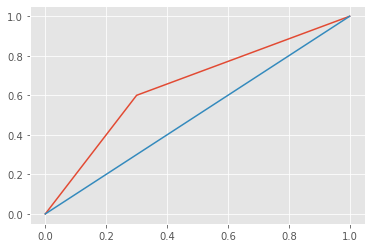

In [163]:
plt.plot(roc_curve1[0],roc_curve1[1])
plt.plot([0,1],[0,1])

plt.show()

In [168]:
roc_auc_score(test.Y, test['class'], average=None)

0.6499999999999999

In [172]:
roc_auc_score(test.Y, prediction.T[1], average=None)

0.8799999999999999